In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('/content/stocks_quarterly.csv')

In [ ]:
data.head()

NameError: ignored

In [ ]:
data=data.dropna(subset=['grossProfit','operatingExpenses','ebit','netIncome_x','totalAssets'])

In [ ]:
data=data.drop(columns=['Stock_Performance','Nasdaq_Performance','nasd_ny_price','price','fiscalDateEnding','nasd_price',	'next_year_date',	'next_year_price','symbol','reportedDate'])

In [ ]:
cols_to_drop = data.isnull().mean().sort_values(ascending = False).head(45).index

In [ ]:
data.drop(columns = cols_to_drop, inplace = True)

In [ ]:
X=data.drop(columns='Label')

In [ ]:
y=data['Label']


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_validate


imputer = KNNImputer(n_neighbors=2)

imputed =imputer.fit_transform(X)


X = pd.DataFrame(imputed, columns=X.columns)


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)




In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_tunned = RandomForestClassifier(bootstrap= True,
 max_depth= 110,
 max_features= 2,
 min_samples_leaf= 3,
 min_samples_split= 8,
 n_estimators= 300)


result_forest_tunned= cross_validate(forest_tunned, X_train, y_train, scoring = ["precision","accuracy","f1","recall","roc_auc"], cv=5)

accuracy_tunned=result_forest_tunned['test_accuracy'].mean()
precision_tunned=result_forest_tunned['test_precision'].mean()
recall_tunned=result_forest_tunned['test_recall'].mean()
f1_tunned=result_forest_tunned['test_f1'].mean()
roc_tunned=result_forest_tunned['test_roc_auc'].mean()


result_forest_tunned

{'fit_time': array([3.67174482, 2.46259737, 1.99060297, 2.00852346, 2.00786257]),
 'score_time': array([0.25945449, 0.15047264, 0.15481329, 0.1549468 , 0.15152287]),
 'test_accuracy': array([0.65997131, 0.64798851, 0.66091954, 0.63793103, 0.63505747]),
 'test_f1': array([0.66760168, 0.66757123, 0.66946779, 0.63688761, 0.64623955]),
 'test_precision': array([0.65927978, 0.63896104, 0.66022099, 0.64619883, 0.63215259]),
 'test_recall': array([0.67613636, 0.69886364, 0.67897727, 0.62784091, 0.66096866]),
 'test_roc_auc': array([0.7064888 , 0.70074656, 0.72747919, 0.68317257, 0.68236509])}

In [ ]:
X_res.shape

(5196, 46)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(estimator = RandomForestClassifier(bootstrap= True,
                                                                                           max_depth= 110,
                                                                                           max_features= 3,
                                                                                           min_samples_leaf= 3,
                                                                                           min_samples_split= 8,
                                                                                           n_estimators= 200),
                                                                                           X = X_train_os, 
                                                                                           y = y_train_os, 
                                                                                           train_sizes = [25,50,100,150,200,250,300], cv = 5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

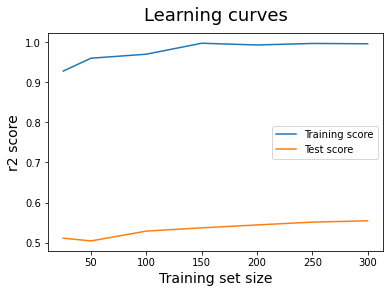

In [ ]:
# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend();

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_oversampled, y_oversampled = ros.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_oversampled, y_oversampled, test_size=0.33, random_state=42)

In [ ]:
forest_tunned_os = RandomForestClassifier(bootstrap= True,
 max_depth= 110,
 max_features= 2,
 min_samples_leaf= 3,
 min_samples_split= 8,
 n_estimators= 300)


result_forest_tunned_os= cross_validate(forest_tunned_os, X_train_os, y_train_os, scoring = ["precision","accuracy","f1","recall","roc_auc"], cv=5)

accuracy_tunned_os=result_forest_tunned_os['test_accuracy'].mean()
precision_tunned_os=result_forest_tunned_os['test_precision'].mean()
recall_tunned_os=result_forest_tunned_os['test_recall'].mean()
f1_tunned_os=result_forest_tunned_os['test_f1'].mean()
roc_tunned_os=result_forest_tunned_os['test_roc_auc'].mean()


result_forest_tunned

{'fit_time': array([3.67174482, 2.46259737, 1.99060297, 2.00852346, 2.00786257]),
 'score_time': array([0.25945449, 0.15047264, 0.15481329, 0.1549468 , 0.15152287]),
 'test_accuracy': array([0.65997131, 0.64798851, 0.66091954, 0.63793103, 0.63505747]),
 'test_f1': array([0.66760168, 0.66757123, 0.66946779, 0.63688761, 0.64623955]),
 'test_precision': array([0.65927978, 0.63896104, 0.66022099, 0.64619883, 0.63215259]),
 'test_recall': array([0.67613636, 0.69886364, 0.67897727, 0.62784091, 0.66096866]),
 'test_roc_auc': array([0.7064888 , 0.70074656, 0.72747919, 0.68317257, 0.68236509])}

In [ ]:
data.columns

Index(['grossProfit', 'totalRevenue', 'costOfRevenue',
       'costofGoodsAndServicesSold', 'operatingIncome',
       'sellingGeneralAndAdministrative', 'operatingExpenses',
       'interestExpense', 'depreciationAndAmortization', 'incomeBeforeTax',
       'incomeTaxExpense', 'netIncomeFromContinuingOperations',
       'comprehensiveIncomeNetOfTax', 'ebit', 'ebitda', 'netIncome_x',
       'totalAssets', 'totalCurrentAssets',
       'cashAndCashEquivalentsAtCarryingValue', 'cashAndShortTermInvestments',
       'totalNonCurrentAssets', 'propertyPlantEquipment', 'otherCurrentAssets',
       'otherNonCurrrentAssets', 'totalLiabilities', 'totalCurrentLiabilities',
       'totalNonCurrentLiabilities', 'shortLongTermDebtTotal',
       'otherCurrentLiabilities', 'totalShareholderEquity', 'retainedEarnings',
       'commonStock', 'commonStockSharesOutstanding', 'operatingCashflow',
       'depreciationDepletionAndAmortization', 'capitalExpenditures',
       'profitLoss', 'cashflowFromInvestment

TETSING GRADIENT BOOSTING CLASSIFIER


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
 from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1,subsample=0.1, random_state=0).fit(X_train_scaled, y_train)





clf_results= cross_validate(clf, X_train_scaled, y_train, scoring = ["precision","accuracy","f1","recall","roc_auc"], cv=5)



clf_results

{'fit_time': array([0.36656332, 0.36289382, 0.37263966, 0.34898543, 0.38125992]),
 'score_time': array([0.01335979, 0.01351357, 0.01325488, 0.01284599, 0.01378584]),
 'test_accuracy': array([0.56671449, 0.56321839, 0.5704023 , 0.5545977 , 0.57902299]),
 'test_f1': array([0.59517426, 0.57422969, 0.59430122, 0.57063712, 0.57720058]),
 'test_precision': array([0.56345178, 0.56629834, 0.56883117, 0.55675676, 0.58479532]),
 'test_recall': array([0.63068182, 0.58238636, 0.62215909, 0.58522727, 0.56980057]),
 'test_roc_auc': array([0.59920537, 0.57540797, 0.59484837, 0.58561542, 0.59269169])}

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(estimator = GradientBoostingClassifier(n_estimators=100, 
                                                                                              learning_rate=0.1 , max_depth=1, random_state=0).fit(X_train, y_train),
                                                                                              X = X_train_scaled, 
                                                                                              y = y_train, 
                                                                                              train_sizes = [100,200,300,450,650,1000,2784], cv = 5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

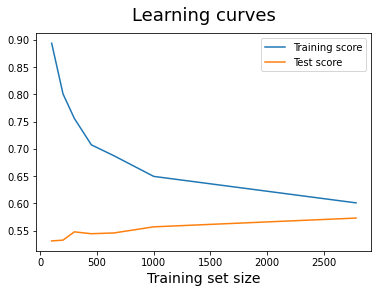

In [ ]:
 
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend();